In [1]:
import csv

from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np

%matplotlib inline

## CSV - Python Standard Library

### CSV File with Headers

In [10]:
data = []

with open("data_with_headers.csv") as csv_file:
    
    csv_reader = csv.DictReader(csv_file)
    
    for row in csv_reader:
        # data.append([ int(v) for v in row.values() ])
        data.append(list(row.values()))
        
display(data)
np.array(data, dtype=np.int8)

[['1', '2', '3'], ['4', '5', '6']]

array([[1, 2, 3],
       [4, 5, 6]], dtype=int8)

### CSV File with No Headers

In [7]:
data = []

with open("data_without_headers.csv") as csv_file:
    
    csv_reader = csv.reader(csv_file)
    
    for row in csv_reader:
        # data.append([ int(v) for v in row ])
        data.append(row)
        
display(data)
np.array(data, dtype=np.int8)

[['1', '2', '3'], ['4', '5', '6']]

array([[1, 2, 3],
       [4, 5, 6]], dtype=int8)

## CSV - Numpy

In [11]:
data = np.loadtxt("data_with_headers.csv", delimiter=",", skiprows=1, dtype=np.int8)

data

array([[1, 2, 3],
       [4, 5, 6]], dtype=int8)

## Max, Min, and Sum

In [12]:
data = np.loadtxt("data.csv", delimiter=",", skiprows=1, dtype=np.int8)

data

array([[ 1,  2,  3,  4,  5],
       [ 6,  7, 99,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int8)

In [13]:
print(np.max(data))
print(np.min(data))

99
1


In [14]:
print(np.max(data, axis=0))
print(np.min(data, axis=0))

[11 12 99 14 15]
[1 2 3 4 5]


In [15]:
print(np.max(data, axis=1))
print(np.min(data, axis=1))

[ 5 99 15]
[ 1  6 11]


In [16]:
print(data.max())
print(data.max(axis=0))
print(data.max(axis=1))

99
[11 12 99 14 15]
[ 5 99 15]


In [18]:
print(data.min())
print(data.min(axis=0))
print(data.min(axis=1))

1
[1 2 3 4 5]
[ 1  6 11]


In [20]:
print(np.sum(data))
print(np.sum(data, axis=0))
print(np.sum(data, axis=1))

211
[ 18  21 115  27  30]
[ 15 131  65]


In [21]:
print(data.sum())
print(data.sum(axis=0))
print(data.sum(axis=1))

211
[ 18  21 115  27  30]
[ 15 131  65]


In [22]:
sum(data) # data.sum(axis=0)

array([ 18,  21, 115,  27,  30], dtype=int8)

## Row and Column Stacking

In [23]:
data = np.loadtxt("data.csv", delimiter=",", skiprows=1, dtype=np.int8)

data

array([[ 1,  2,  3,  4,  5],
       [ 6,  7, 99,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int8)

In [26]:
row_totals = data.sum(axis=1)

data = np.column_stack([ data, row_totals ])

data

array([[  1,   2,   3,   4,   5,  15],
       [  6,   7,  99,   9,  10, 131],
       [ 11,  12,  13,  14,  15,  65]])

In [29]:
col_totals = data.sum(axis=0)

col_totals

data = np.row_stack([ data, col_totals ])

data

array([[  1,   2,   3,   4,   5,  15],
       [  6,   7,  99,   9,  10, 131],
       [ 11,  12,  13,  14,  15,  65],
       [ 18,  21, 115,  27,  30, 211]])

## Matplotlib Multiple Plots and Chart Customizing

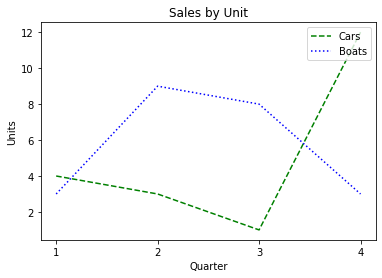

In [36]:
car_sales = np.array([
    [1,4], [2,3], [3,1], [4,12]  # [sales_qtr, sales]
])

# display(car_sales)

boat_sales = np.array([
    [1,3], [2,9], [3,8], [4,3]  # [sales_qtr, sales]
])

ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(car_sales[:, 0], car_sales[:, 1], label="Cars", color="green", linestyle="dashed")
plt.plot(boat_sales[:, 0], boat_sales[:, 1], label="Boats", color="blue", linestyle="dotted")

plt.title("Sales by Unit")
plt.xlabel("Quarter")
plt.ylabel("Units")

plt.legend(loc="upper right")

plt.show()